# **Hand Gesture Recognition Database**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨💻Author: Irfan Ullah Khan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)
[![Website](https://img.shields.io/badge/Website-Contact%20Me-red?style=for-the-badge&logo=website)](https://datasciencetoyou.odoo.com)


# Objectives

<li>View the data as an image</li><br>
<li>Train different classifiers</li><br>
<li>Compare performance for different classifiers using various metrics</li>

# Dataset

# Dataset description

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
#reading csv file
df=pd.read_csv('/content/sign_mnist_train.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [4]:
#shape of the data
df.shape

(1380, 785)

In [5]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [6]:
df.isnull().values.any()#finding null values

True

<Axes: >

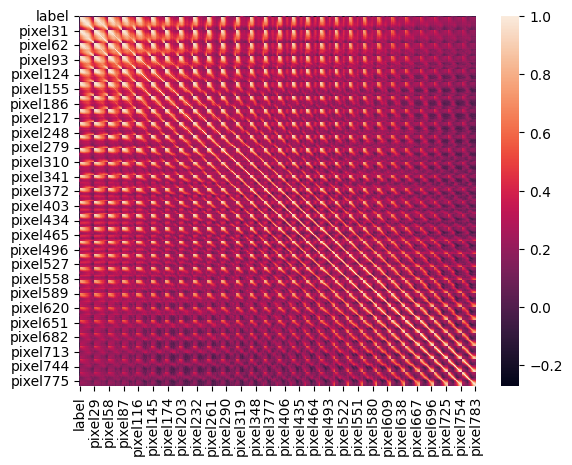

In [7]:
#defining corelation using heat map
corr_m = df.corr()
sns.heatmap(corr_m)

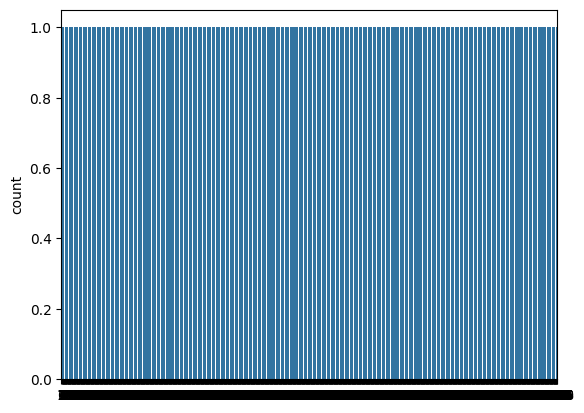

In [8]:
#plotting he total number of each type of label in data
sns.countplot(df['label'])
plt.show()

In [9]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [10]:
# print(X)
print(Y)

0        3
1        6
2        2
3        2
4       13
        ..
1375    23
1376    22
1377    20
1378     7
1379    22
Name: label, Length: 1380, dtype: int64


# Forming pictures from pixels

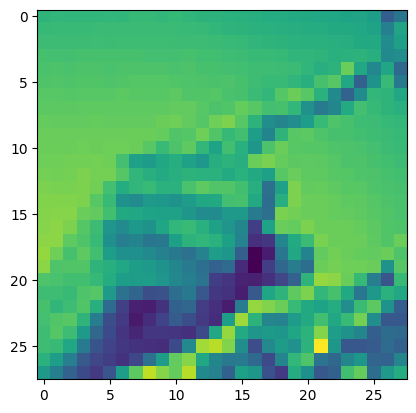

In [11]:
first = X.iloc[1,:]
# print(first)
first = np.array(first , dtype='float')
pixel = first.reshape((28,28))
plt.imshow(pixel)
plt.show()

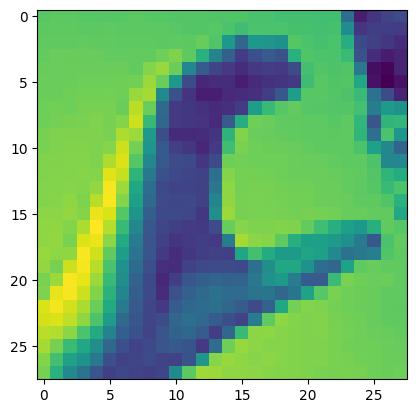

In [12]:
second = X.iloc[2,:]
second = np.array(second , dtype='float')
pixel2 = second.reshape((28,28))
plt.imshow(pixel2)
plt.show()

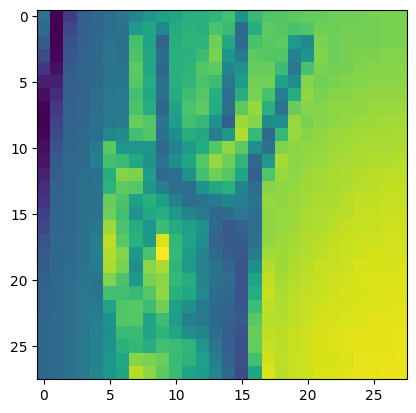

In [13]:
third = X.iloc[7,:]
third = np.array(third , dtype='float')
pixel3 = third.reshape((28,28))
plt.imshow(pixel3)
plt.show()

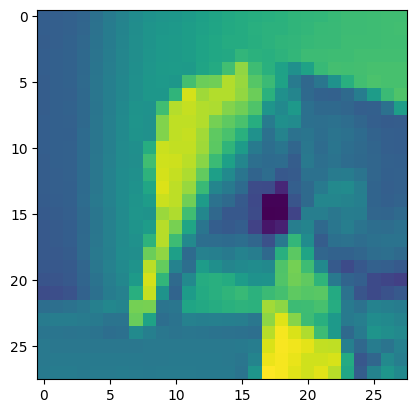

In [14]:
fourth = X.iloc[15,:]
fourth = np.array(fourth , dtype='float')
pixel4 = fourth.reshape((28,28))
plt.imshow(pixel4)
plt.show()

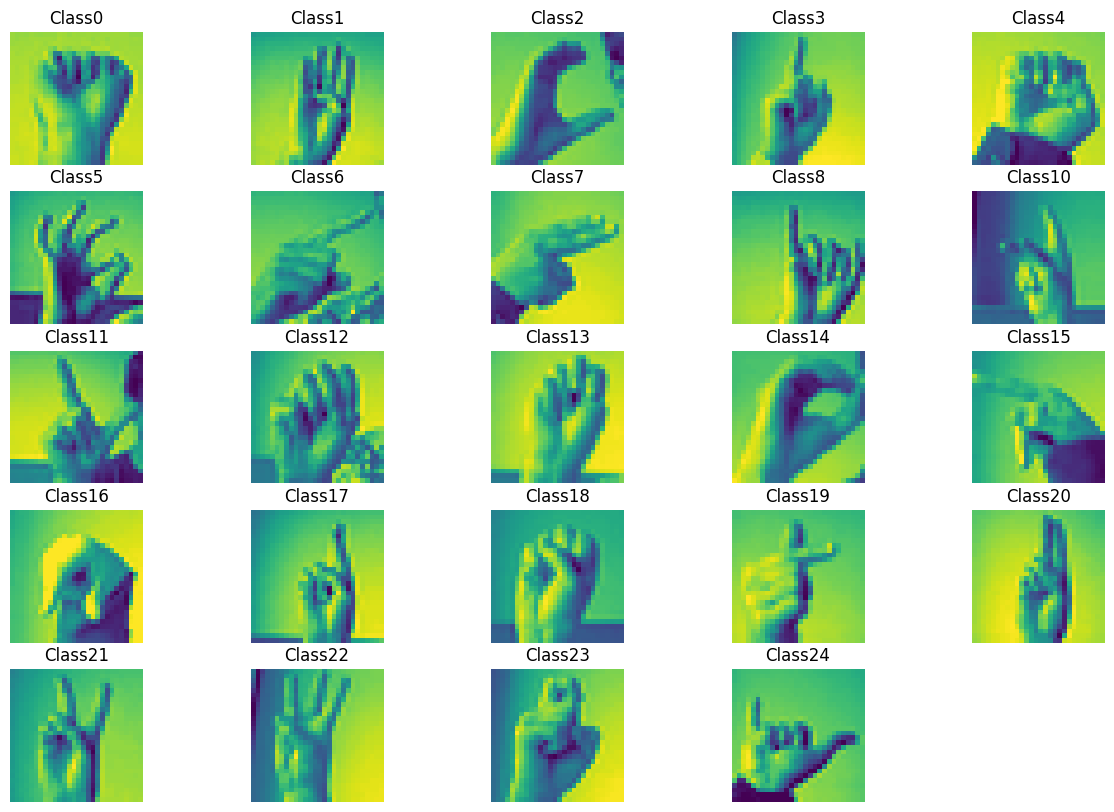

In [15]:
plt.figure(figsize=(15,10))
k = 0
for i in range(26):
    if(i==9 or i==25):
        continue
    else:
        plt.subplot(5,5,k+1)
        img=df[df.label==i].iloc[0,1:].values
        img=img.reshape((28,28))
        plt.imshow(img)
        plt.title("Class" + str(i))
        plt.axis('off')
        k=k+1
plt.show()

### Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## 1.KNN

In [18]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


In [21]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate
classifier = KNeighborsClassifier()
#fitting the data
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [22]:
#predict
Y_pred=classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(Y_test,Y_pred)

<Axes: >

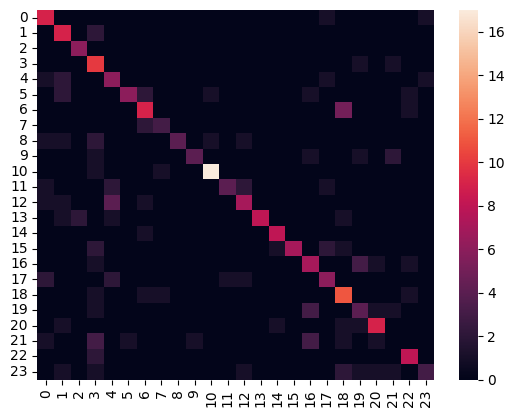

In [26]:
sns.heatmap(cm)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
#accuracy score
ascore=accuracy_score(Y_test , Y_pred , normalize=True)
print(ascore)

0.5978260869565217


In [29]:
from sklearn.metrics import f1_score
#f1_score
score=f1_score(Y_pred,Y_test,average='micro')
print(score)

0.5978260869565217


## 2.Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
Y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
ascore1=accuracy_score(Y_test , Y_pred , normalize=True)
print(ascore1)

0.782608695652174


In [33]:
score1=f1_score(Y_pred,Y_test,average='micro')
print(score1)

0.782608695652174


# 3.SVM

In [34]:
from sklearn.svm import SVC
#instantiate
svc = SVC()
#fiting the data
svc.fit(X_train , Y_train)

SVC()

In [35]:
#predict
sv_pred = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [36]:
ascore3=accuracy_score(Y_test , sv_pred, normalize=True)
print(ascore3)

0.7608695652173914


In [37]:
score3=f1_score(Y_pred,sv_pred,average='weighted')
print(score3)

0.7682431925529398


# 4.Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
#instantiate
obj = GaussianNB()

In [40]:
#fitting the data
obj.fit(X_train,Y_train)

GaussianNB()

In [41]:
#predict
Y_pred = obj.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [42]:
ascore4=accuracy_score(Y_test,Y_pred, normalize=True)
print(ascore4)

0.37318840579710144


In [43]:
score4=f1_score(Y_pred,Y_test,average='micro')
print(score4)

0.37318840579710144


# 5.MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB
#instantiate
ob = MultinomialNB()
#fitting the data
ob.fit(X_train,Y_train)

MultinomialNB()

In [45]:
#predict
Y_pred = ob.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [46]:
ascore5=accuracy_score(Y_test,Y_pred, normalize=True)
print(ascore5)

0.5471014492753623


In [48]:
score5=f1_score(Y_pred,Y_test,average='micro')
print(score5)

0.5471014492753623


# 6.Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
# instantiate
dtc = DecisionTreeClassifier()


In [50]:
# fitting the data
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [51]:
# predict
Y_pred = dtc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [52]:
#accuracy
ascore6=accuracy_score(Y_test,Y_pred)
print(ascore6)

0.391304347826087


In [53]:
# f1 score
score6 = f1_score(Y_pred, Y_test,average='weighted')
print(score6)

0.40224762262081304



# 7.RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
#instantiate
rc = RandomForestClassifier()
#fitting the data
rc.fit(X_train , Y_train)

RandomForestClassifier()

In [56]:
#predict
rc_pred = rc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [57]:
ascore2=accuracy_score(Y_test , rc_pred)
print(ascore2)

0.7463768115942029


In [58]:
score2=f1_score(Y_pred,Y_test,average='micro')
print(score2)

0.391304347826087


# Conclusion

### By the Implemented of 6 Algorithms ,now we can compare the performance of them.

In [59]:
Accuracy = [ascore,ascore1,ascore2,ascore3,ascore4,ascore5,ascore6]
data1 = {
    'Accuracy':Accuracy,
    'Algorithm': ['KNN','Logistic Regression','Random Forest Classifier','SVM linear',"Naive Baye's","MultinominalNB",'Decision Tree']}

df1 = pd.DataFrame(data1)

In [60]:
F1_score = [score,score1,score2,score3,score4,score5,score6]
data2 = {
    'F1_score':F1_score,
    'Algorithm': ['KNN','Logistic Regrss,ion','Random Forest Classifier','SVM linear',"Naive Baye's","MultinominalNB",'Decision Tree']}

df2 = pd.DataFrame(data2)

<Axes: xlabel='Accuracy', ylabel='Algorithm'>

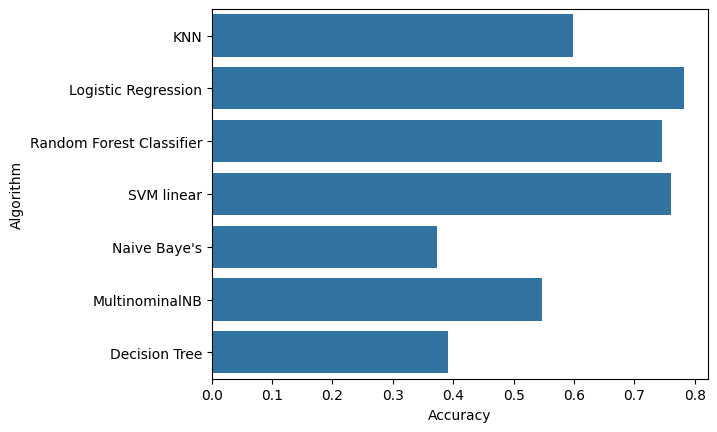

In [61]:
sns.barplot(x = df1.Accuracy, y = df1.Algorithm)

<Axes: xlabel='F1_score', ylabel='Algorithm'>

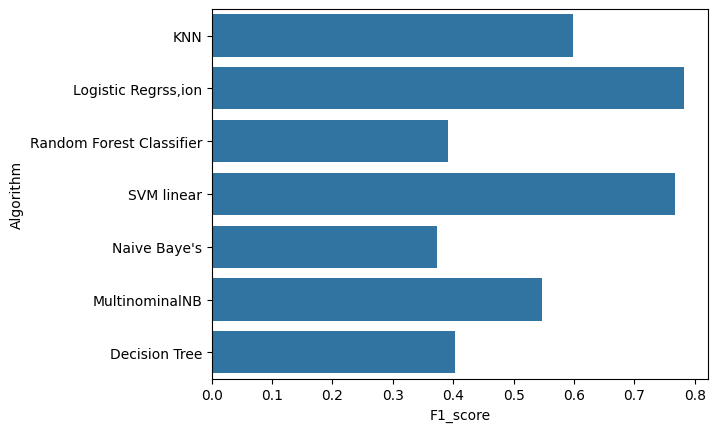

In [69]:
sns.barplot(x = df2.F1_score, y = df2.Algorithm)

####**Now we can say that the best model in the above 6 models on the basis of accuracy is the logistic regression model**